<a href="https://colab.research.google.com/github/sman-1010/ANALYZING-PAINTER-S-INFLUENCES-ON-ARTWORKS-WITH-CNNS/blob/main/Github_Loaded_Painting_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
import tensorflow as tf

In [ ]:
!ls

artists.csv    picnames_15feb	       styles.csv
images	       predictions_list        v1_100px1e_my_model.h5
kaggle.json    predictions_list_15feb  v2_100px10e_my_model.h5
myntradataset  resized		       v3_200px10e_my_model_15feb.h5
picnames       saved_model


In [ ]:
labels={0: 'Vincent_van_Gogh',
 1: 'Edgar_Degas',
 2: 'Pablo_Picasso',
 3: 'Pierre-Auguste_Renoir',
 4: 'Albrecht_Du╠Иrer',
 5: 'Paul_Gauguin',
 6: 'Francisco_Goya',
 7: 'Rembrandt',
 8: 'Alfred_Sisley',
 9: 'Titian',
 10: 'Marc_Chagall',
}

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('v3_200px10e_my_model_15feb.h5')

Predicted artist = Titian
Prediction probability = 86.99520230293274 %

Titian 87.00%
Marc_Chagall 2.77%
Pierre-Auguste_Renoir 2.11%


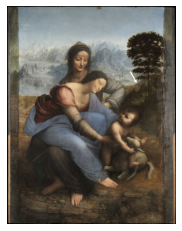

In [ ]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
# url = 'https://www.gpsmycity.com/img/gd/2081.jpg'
url = 'https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41598-020-78623-5/MediaObjects/41598_2020_78623_Fig1_HTML.jpg'
# url = "https://i.ibb.co/frR7xXK/ship.jpg"
train_input_shape = (224, 224, 3)

from keras.preprocessing import *
import imageio
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = new_model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")
sorted_predictions= sorted(enumerate(prediction[0]), key=lambda i: i[1])
print("")
for i in range(1,4):
  print(f'{labels[sorted_predictions[-i][0]]} {sorted_predictions[-i][1]*100:.2f}%')

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()





In [ ]:
!pwd

/content/gdrive/MyDrive/Kaggle


In [ ]:
artists = pd.read_csv('/content/gdrive/MyDrive/Kaggle/artists.csv')

In [ ]:
# Sort artists by number of paintings
artists = artists.sort_values(by=['paintings'], ascending=False)

# Create a dataframe with artists having more than 200 paintings
artists_top = artists[artists['paintings'] >= 200].reset_index()
artists_top = artists_top[['name', 'paintings']]

In [ ]:
artists_top

,name,paintings
0,Vincent van Gogh,877
1,Edgar Degas,702
2,Pablo Picasso,439
3,Pierre-Auguste Renoir,336
4,Albrecht Dürer,328
5,Paul Gauguin,311
6,Francisco Goya,291
7,Rembrandt,262
8,Alfred Sisley,259
9,Titian,255


In [ ]:
# updated_name = "Albrecht_Dürer".replace("_", " ")
updated_name = "Albrecht_Du╠Иrer"
artists_top.iloc[4, 0] = updated_name

# Explore images of top artists
images_dir = '/content/gdrive/MyDrive/Kaggle/images/images'
artists_dirs = os.listdir(images_dir)
artists_top_name = artists_top['name'].str.replace(' ', '_').values
artists_pics = artists_top['paintings'].values
# See if all directories exist
for name in artists_top_name:
    if os.path.exists(os.path.join(images_dir, name)):
        print("Found -->", os.path.join(images_dir, name))
    else:
        print("Did not find -->", os.path.join(images_dir, name))

Found --> /content/gdrive/MyDrive/Kaggle/images/images/Vincent_van_Gogh
Found --> /content/gdrive/MyDrive/Kaggle/images/images/Edgar_Degas
Found --> /content/gdrive/MyDrive/Kaggle/images/images/Pablo_Picasso
Found --> /content/gdrive/MyDrive/Kaggle/images/images/Pierre-Auguste_Renoir
Found --> /content/gdrive/MyDrive/Kaggle/images/images/Albrecht_Du╠Иrer
Found --> /content/gdrive/MyDrive/Kaggle/images/images/Paul_Gauguin
Found --> /content/gdrive/MyDrive/Kaggle/images/images/Francisco_Goya
Found --> /content/gdrive/MyDrive/Kaggle/images/images/Rembrandt
Found --> /content/gdrive/MyDrive/Kaggle/images/images/Alfred_Sisley
Found --> /content/gdrive/MyDrive/Kaggle/images/images/Titian
Found --> /content/gdrive/MyDrive/Kaggle/images/images/Marc_Chagall


Marc_Chagall
Pablo_Picasso
Vincent_van_Gogh
Alfred_Sisley
Pierre-Auguste_Renoir


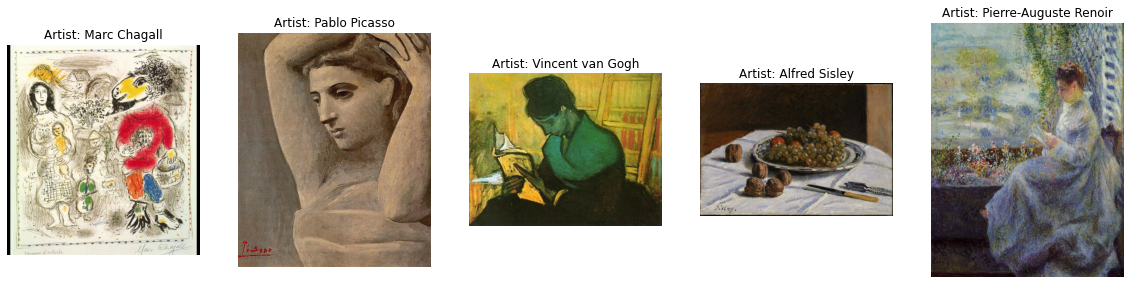

In [ ]:
n = 5
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    random_artist = random.choice(artists_top_name)
    print(random_artist)
    random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, random_artist, random_image)
    image1 = plt.imread(random_image_file)
    axes[i].imshow(image1)
    axes[i].set_title("Artist: " + random_artist.replace('_', ' '))
    axes[i].axis('off')

plt.show()

In [ ]:
artists_pics

array([877, 702, 439, 336, 328, 311, 291, 262, 259, 255, 239])

In [ ]:
for i in range(len(artists_top_name)):
  print(artists_top_name[i])
  print(artists_pics[i])

Vincent_van_Gogh
877
Edgar_Degas
702
Pablo_Picasso
439
Pierre-Auguste_Renoir
336
Albrecht_Du╠Иrer
328
Paul_Gauguin
311
Francisco_Goya
291
Rembrandt
262
Alfred_Sisley
259
Titian
255
Marc_Chagall
239


In [ ]:
random_image_file='/content/gdrive/MyDrive/Kaggle/images/images/Pablo_Picasso/Pablo_Picasso_105.jpg'
web_image = imageio.imread(random_image_file)
if len(web_image.shape)==2:
  shp=web_image.shape
  an_array = np.full([shp[0], shp[1],3], 0)
  for i in range(shp[0]):
    for ii in range(shp[1]):
      a=web_image[i,ii]
      an_array[i,ii]=[a,a,a]
  web_image=np.uint8(an_array)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)
print(web_image.shape)
prediction = new_model.predict(web_image)

(1, 224, 224, 3)


In [ ]:
len(picnames)

In [ ]:
len(predictions_list)

7091

# Save the Feature Space Lists

In [ ]:
import pickle

# with open("picnames_15feb", "wb") as fp:   #Pickling
#    pickle.dump(picnames, fp)

In [ ]:
# with open("predictions_list_15feb", "wb") as fp:   #Pickling
#    pickle.dump(predictions_list, fp)

In [ ]:
!ls


artists.csv    picnames_15feb	       styles.csv
images	       predictions_list        v1_100px1e_my_model.h5
kaggle.json    predictions_list_15feb  v2_100px10e_my_model.h5
myntradataset  resized		       v3_200px10e_my_model_15feb.h5
picnames       saved_model


In [ ]:
with open("picnames_15feb", "rb") as fp:   # Unpickling
   picnames_restored = pickle.load(fp)

In [ ]:
with open("predictions_list_15feb", "rb") as fp:   # Unpickling
   predictions_list_restored = pickle.load(fp)

In [ ]:
len(predictions_list_restored)

4299

In [ ]:
len(predictions_list_restored[0])

11

#Working with Feature space

#Which Painting is yours most similar to?

Predicted artist = Pablo Picasso

Pablo_Picasso 88.28%
Marc_Chagall 6.54%
Paul_Gauguin 1.73%


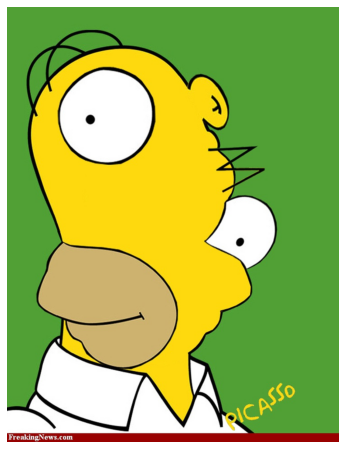

In [ ]:
# url = "https://i.ibb.co/frR7xXK/ship.jpg"
# url = 'https://static01.nyt.com/images/2018/03/02/arts/design/02picasso-print/01picasso1-jumbo.jpg' #WORKING!!!
# url = "https://nofilmschool.com/sites/default/files/styles/article_wide/public/nappy.jpg"
# url = 'https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41598-020-78623-5/MediaObjects/41598_2020_78623_Fig1_HTML.jpg' #WORKING!!!
# url = "https://cdn.domestika.org/c_fit,dpr_auto,f_auto,t_base_params,w_820/v1621556913/content-items/007/973/816/CampoDeGirasoles-original.jpg?1621556913"
url = "https://i.pinimg.com/736x/9b/49/de/9b49dead3be505b95fbde4d1097e5f58--les-simpson-homer-simpson.jpg"

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


your_prediction = new_model.predict(web_image)
prediction_probability = np.amax(your_prediction)
prediction_idx = np.argmax(your_prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
# print("Prediction probability =", prediction_probability*100, "%")
sorted_predictions= sorted(enumerate(your_prediction[0]), key=lambda i: i[1])
print("")
yourtop3=[]
for i in range(1,4):
  print(f'{labels[sorted_predictions[-i][0]]} {sorted_predictions[-i][1]*100:.2f}%')
  yourtop3.append(sorted_predictions[-i][0])
plt.figure(figsize = (8,8))
plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()

yourtop3
yourtop3x=yourtop3

### Analysis on Feature Space as one code block

2006 2.5749207e-05
With a difference of 0.00% in artistic style



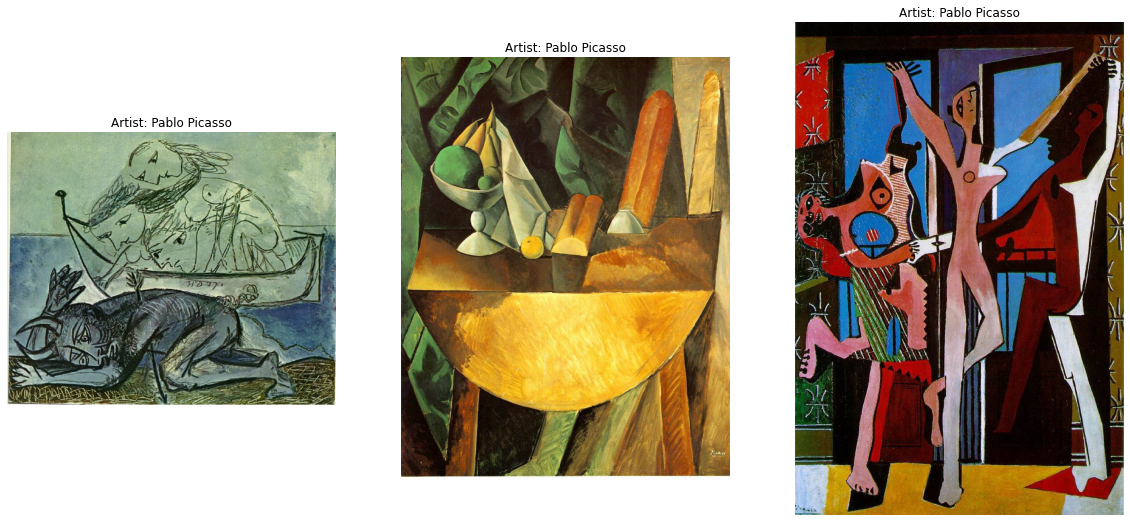

In [ ]:
## Find the top columns that sum to 50%
sorted_predictions= sorted(enumerate(your_prediction[0]), key=lambda i: i[1])
yourtop3=[]
sum=0
threshold=0.8
for i in range(1,12):
  sum+=sorted_predictions[-i][1]
  yourtop3.append(sorted_predictions[-i][0])
  # print(f'{labels[sorted_predictions[-i][0]]} {sorted_predictions[-i][1]*100:.2f}%')
  if sum>threshold:
    break

predictions_list_restored_np=np.array(predictions_list_restored)

reduced_predictions=predictions_list_restored_np[:, yourtop3]

reduced_yourpred=your_prediction[:,yourtop3]

min_dis=999
all_dis=[]
for i in range(len(reduced_predictions)):
  # print(reduced_predictions[i])
  distance = np.linalg.norm(reduced_predictions[i] - reduced_yourpred)
  all_dis.append(distance)
  if distance<min_dis:
    min_dis=distance
    min_index=i

la=[]
sorted_distances= sorted(enumerate(all_dis), key=lambda i: i[1])
print(min_index,min_dis)
for i in sorted_distances[:3]:
  la.append(picnames_restored[i[0]])

top3artists=[]
for i in la:
  i=i[::-1]
  flag=0
  newname=''
  for ii in i:
    if flag==1:
      newname+=ii
    if ii=="_":
      flag=1
  newname=newname[::-1]
  top3artists.append(newname)

n=len(la)
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    # random_artist = random.choice(artists_top_name)
    # random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, top3artists[i], la[i])
    iimage = plt.imread(random_image_file)
    axes[i].imshow(iimage)
    axes[i].set_title("Artist: " + top3artists[i].replace('_', ' '))
    axes[i].axis('off')

print(f'With a difference of {min_dis*100:.2f}% in artistic style')
print("") 

plt.show()




## Analysis on feature space

In [ ]:
your_prediction

array([[0.3211214 , 0.08777378, 0.12347431, 0.0842704 , 0.03807626,
        0.06996097, 0.02828659, 0.02706136, 0.01982258, 0.09014291,
        0.11000945]], dtype=float32)

In [ ]:
predictions_list_restored[:2]

[array([0.6179486 , 0.07424639, 0.04192924, 0.03937411, 0.02524365,
        0.02991527, 0.00674756, 0.01368379, 0.00959858, 0.06872275,
        0.07259014], dtype=float32),
 array([0.6966299 , 0.03768893, 0.03847315, 0.03161496, 0.0094019 ,
        0.03958513, 0.00501347, 0.00888716, 0.00318427, 0.08164643,
        0.04787471], dtype=float32)]

In [ ]:
picnames_restored[:5]

['Vincent_van_Gogh_116.jpg',
 'Vincent_van_Gogh_107.jpg',
 'Vincent_van_Gogh_105.jpg',
 'Vincent_van_Gogh_101.jpg',
 'Vincent_van_Gogh_117.jpg']

### Define a function where we take eucledian distance for top n artist input proabilities that sum to 70%

In [ ]:
## Find the top columns that sum to 50%
sorted_predictions= sorted(enumerate(your_prediction[0]), key=lambda i: i[1])
print("")
yourtop3=[]
sum=0
threshold=0.7
for i in range(1,12):
  sum+=sorted_predictions[-i][1]
  yourtop3.append(sorted_predictions[-i][0])
  print(f'{labels[sorted_predictions[-i][0]]} {sorted_predictions[-i][1]*100:.2f}%')
  if sum>threshold:
    break

yourtop3


Vincent_van_Gogh 32.11%
Pablo_Picasso 12.35%
Marc_Chagall 11.00%
Titian 9.01%
Edgar_Degas 8.78%


[0, 2, 10, 9, 1]

In [ ]:
predictions_list_restored_np=np.array(predictions_list_restored)
predictions_list_restored_np.shape
predictions_list_restored_np[0]

array([0.6179486 , 0.07424639, 0.04192924, 0.03937411, 0.02524365,
       0.02991527, 0.00674756, 0.01368379, 0.00959858, 0.06872275,
       0.07259014], dtype=float32)

In [ ]:
reduced_predictions=predictions_list_restored_np[:, yourtop3]
reduced_predictions.shape
reduced_predictions[0]


array([0.6179486 , 0.04192924, 0.07259014, 0.06872275, 0.07424639],
      dtype=float32)

In [ ]:
print(your_prediction)
reduced_yourpred=your_prediction[:,yourtop3]
reduced_yourpred

[[0.3211214  0.08777378 0.12347431 0.0842704  0.03807626 0.06996097
  0.02828659 0.02706136 0.01982258 0.09014291 0.11000945]]


array([[0.3211214 , 0.12347431, 0.11000945, 0.09014291, 0.08777378]],
      dtype=float32)

### Find eucledian distance between reduced_yourpred and reduced_predictions

In [ ]:
min_dis=999
all_dis=[]
for i in range(len(reduced_predictions)):
  # print(reduced_predictions[i])
  distance = np.linalg.norm(reduced_predictions[i] - reduced_yourpred)
  all_dis.append(distance)
  if distance<min_dis:
    min_dis=distance
    min_index=i

sorted_distances= sorted(enumerate(all_dis), key=lambda i: i[1])
print(min_index,min_dis)
for i in sorted_distances[:3]:
  print(i)

1871 0.00021624565
(1871, 0.00021624565)
(1831, 0.00025105476)
(1713, 0.00028264523)


### Print the most similar picture 

['Vincent_van_Gogh']


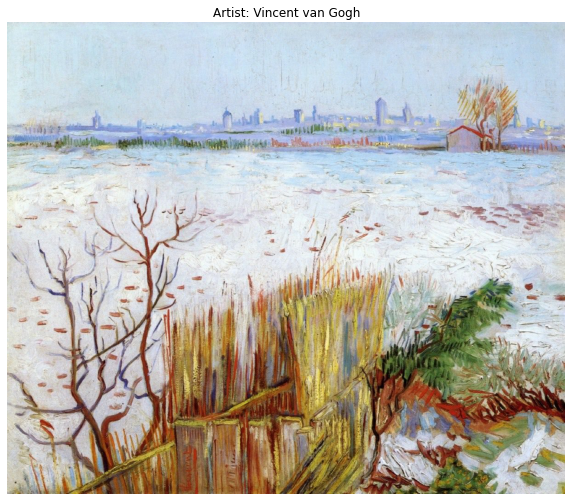

In [ ]:
top3artists=[]
for i in [picnames_restored[min_index]]:
  i=i[::-1]
  flag=0
  newname=''
  for ii in i:
    if flag==1:
      newname+=ii
    if ii=="_":
      flag=1
  newname=newname[::-1]
  top3artists.append(newname)

# n = len(narrowed_down)
n=1
fig, axes = plt.subplots(1, n, figsize=(10,10))

print(top3artists)

random_image_file = os.path.join(images_dir, top3artists[0], picnames_restored[min_index])
iimage = plt.imread(random_image_file)
axes.imshow(iimage)
axes.set_title("Artist: " + top3artists[0].replace('_', ' '))
axes.axis('off')

plt.show()

# /content/gdrive/MyDrive/Kaggle/images/images/Vincent_van_Gogh/Vincent_van_Gogh_228.jpg
# /content/gdrive/MyDrive/Kaggle/images/images/Vincent_van_Gogh_228.jpg

## Create a Tree that branches by 30 thrice , for top 3 artists

In [ ]:
#Top3 of each picture 
top3ofeach=[]
for pred in predictions_list_restored:
  sorted_predictions= sorted(enumerate(pred), key=lambda i: i[1])
  # print(sorted_predictions)
  dummy=[]
  for i in range(1,4):
    dummy.append(sorted_predictions[-i][0])
  top3ofeach.append(dummy)

print(top3ofeach)

[[0, 1, 10], [0, 9, 10], [0, 9, 10], [0, 5, 9], [0, 9, 10], [0, 1, 10], [7, 2, 10], [0, 10, 2], [0, 9, 10], [0, 9, 10], [0, 9, 2], [8, 4, 10], [0, 9, 2], [0, 9, 2], [0, 9, 10], [0, 9, 2], [0, 9, 10], [0, 9, 1], [0, 2, 9], [0, 5, 10], [0, 1, 9], [0, 9, 10], [7, 2, 4], [0, 9, 2], [0, 9, 10], [0, 9, 2], [0, 9, 2], [4, 10, 6], [0, 1, 9], [0, 9, 1], [0, 10, 5], [0, 9, 2], [0, 9, 2], [0, 9, 1], [0, 5, 10], [1, 0, 10], [8, 10, 4], [0, 10, 3], [0, 10, 3], [0, 9, 2], [0, 9, 1], [0, 10, 9], [0, 5, 3], [0, 9, 10], [0, 5, 1], [0, 9, 2], [0, 9, 10], [2, 10, 0], [5, 1, 2], [0, 10, 9], [0, 9, 10], [0, 9, 2], [0, 9, 5], [0, 9, 10], [0, 10, 3], [0, 2, 9], [0, 9, 10], [0, 9, 10], [0, 5, 9], [0, 8, 4], [0, 2, 9], [2, 10, 3], [0, 9, 2], [0, 9, 10], [0, 9, 1], [0, 9, 10], [0, 9, 10], [0, 9, 2], [0, 9, 2], [2, 0, 9], [10, 0, 2], [0, 9, 10], [0, 9, 2], [2, 7, 9], [5, 0, 10], [0, 10, 9], [0, 9, 1], [0, 9, 10], [5, 9, 2], [0, 10, 9], [0, 9, 1], [0, 9, 2], [0, 9, 10], [0, 9, 10], [0, 9, 10], [0, 5, 10], [0, 1, 

In [ ]:
top2ofeach=[]
for i in top3ofeach:
  top2ofeach.append(i[:2])

print(top2ofeach[0])

[0, 1]


In [ ]:
# sorted_predictions= sorted(enumerate(pred), key=lambda i: i[1])
# dummy=[]
# for i in range(1,4):
#     dummy.append(sorted_predictions[-i][0])
# yourtop3=dummy
# print(yourtop3)

[10, 6, 1]


In [ ]:
#Find similar top 3
narrowed_down=[]
narrowed_down_preds=[]
yourtop3=yourtop3x
for i in range(len(top3ofeach)):
  if top3ofeach[i]==yourtop3:
    narrowed_down.append(picnames_restored[i])
    narrowed_down_preds.append(predictions_list_restored[i])
    
if len(narrowed_down)==0:
  dumy=[]
  dumy.append(yourtop3[1])
  dumy.append(yourtop3[0])
  dumy.append(yourtop3[2])
  for i in range(len(top3ofeach)):
    if top3ofeach[i]==dumy:
      narrowed_down.append(picnames_restored[i])
      narrowed_down_preds.append(predictions_list_restored[i])
# if len(narrowed_down)==0:
#   for i in range(len(top2ofeach)):
#     if top2ofeach[i]==yourtop3[:2]:
#       narrowed_down.append(picnames_restored[i])
#       narrowed_down_preds.append(predictions_list_restored[i])

print(len(narrowed_down))
limit=8
narrowed_down=narrowed_down[:limit]
narrowed_down_preds=narrowed_down_preds[:limit]
print(narrowed_down)

for ndp in narrowed_down_preds:
  sorted_predictions= sorted(enumerate(ndp), key=lambda i: i[1])
  for i in range(1,4):
    print(f'{labels[sorted_predictions[-i][0]]} {sorted_predictions[-i][1]*100:.2f}%')
  print("")


192
['Vincent_van_Gogh_156.jpg', 'Edgar_Degas_153.jpg', 'Pablo_Picasso_102.jpg', 'Pablo_Picasso_10.jpg', 'Pablo_Picasso_104.jpg', 'Pablo_Picasso_103.jpg', 'Pablo_Picasso_107.jpg', 'Pablo_Picasso_113.jpg']
Pablo_Picasso 79.37%
Marc_Chagall 9.77%
Paul_Gauguin 2.73%

Pablo_Picasso 71.33%
Marc_Chagall 11.25%
Paul_Gauguin 4.60%

Pablo_Picasso 84.71%
Marc_Chagall 4.70%
Paul_Gauguin 2.09%

Pablo_Picasso 91.33%
Marc_Chagall 3.75%
Paul_Gauguin 1.57%

Pablo_Picasso 85.25%
Marc_Chagall 7.90%
Paul_Gauguin 1.37%

Pablo_Picasso 98.52%
Marc_Chagall 0.81%
Paul_Gauguin 0.27%

Pablo_Picasso 85.91%
Marc_Chagall 8.17%
Paul_Gauguin 1.26%

Pablo_Picasso 91.43%
Marc_Chagall 4.38%
Paul_Gauguin 1.27%



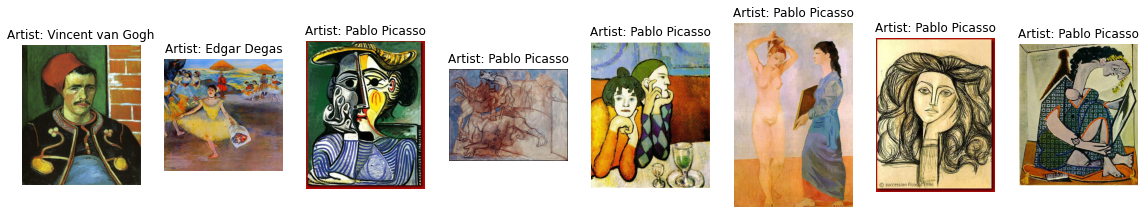

In [ ]:
top3artists=[]
for i in narrowed_down:
  i=i[::-1]
  flag=0
  newname=''
  for ii in i:
    if flag==1:
      newname+=ii
    if ii=="_":
      flag=1
  newname=newname[::-1]
  top3artists.append(newname)

n = len(narrowed_down)
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    # random_artist = random.choice(artists_top_name)
    # random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, top3artists[i], narrowed_down[i])
    iimage = plt.imread(random_image_file)
    axes[i].imshow(iimage)
    axes[i].set_title("Artist: " + top3artists[i].replace('_', ' '))
    axes[i].axis('off')

plt.show()
